## Running population-based simulations in *gpvolve* using SLiM

Current functionality of `gpvolve.slimsim.GenotypePhenotypeSLiM`

In [10]:
import gpmap, gpvolve, os, shutil
from IPython.display import Image

### 1. Generate a rough mount fuji map with 5 sites, each with 2 states

`GenotypePhenotypeSLiM` is built around a `GenotypePhenotypeMap` object that informs the fitness values of each genotype

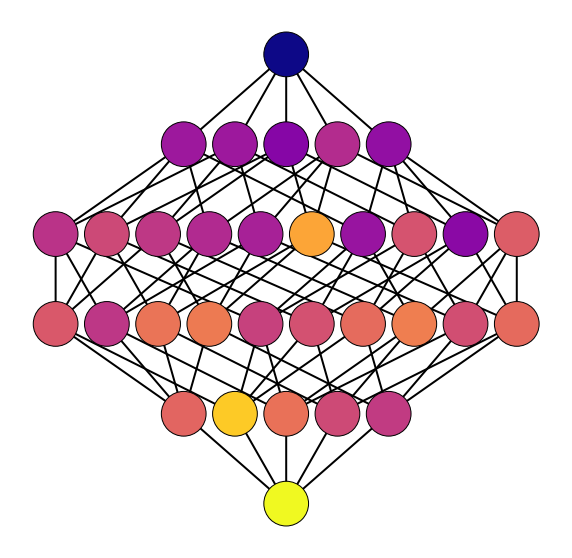

In [11]:
# make map
gpm = gpmap.simulate.generate_gpm(alphabet='01', num_sites=5, num_states_per_site=2)

# generate fuji fitness landscape towards derived state
gpm.data.loc[:, 'fitness'] = gpmap.simulate.fuji(gpm, ref_genotype = '11111', roughness = 0.1)
gpm.data.loc[len(gpm.data)-1,'fitness']=max(gpm.data.fitness)+0.1
gpm.data.loc[gpm.data.fitness < 0, 'fitness'] = 0
gpm.get_neighbors()

# plot
G=gpmap.GenotypePhenotypeGraph()
G.add_gpm(gpm)
mask = gpm.neighbors.direction != 1
gpm.neighbors.loc[mask,"include"] = False
G.add_node_cmap(data_column="fitness")
G.edge_options["arrows"] = None
G.edge_options["arrowsize"]=0.001
G.node_options["node_size"] = 2000
g = gpmap.plot(G, plot_node_labels=False, edge_options={'width':2})

#### 1.5. Create a directory for SLiM files

SLiM relies on a different language to read/write files, so a separate directory for its inputs and outputs can help keep things tidy

In [14]:
# delete test run if it already exists
if os.path.exists('SLiM_demo'):
    shutil.rmtree('SLiM_demo')
os.makedirs('SLiM_demo')

### 2. Initialize `GenotypePhenotypeSLiM` object, run a simulation

The primary function of the `GenotypePhenotypeSLiM` object is to run a SLiM simulation, which returns the object with SLiM results as attributes.

`slimulate()` takes the following parameters:

- `population_size`

    number of individuals in the population
- `mutation_rate`

    mutation rate (per site per generation)
- `max_generation`

    number of generations to run simulation for (simulation will finish if all mutations fix before)
- `outpath`
    
    path for SLiM write/read files
- `overwrite (default = False)` 

    if `GenotypePhenotypeSLiM` files exist at the outpath, overwrite them (otherwise throw error)
- `slim_path (default = 'slim')`

    path to SLiM build (if installed via PyPI, just 'slim')
- `haploid (default = False)`

    run a haploid population?
- `slim_column (default = 'fitness')`

    column for SLiM to consider as the fitness value

In [15]:
# load gpmap into slimsim
sim = gpvolve.slimsim.GenotypePhenotypeSLiM(gpm)

# run simulation
sim.slimulate(population_size = 1000,
              mutation_rate = .01,
              max_generation = 5000,
              outpath = 'SLiM_demo/5_site_fuji',
              overwrite=True,
              slim_path = 'slim',
              fitness_column = 'fitness')

### 3. Looking at outputs

Running `.slimulate()` establishes attributes of the `GenotypePhenotypeSLiM` object that store outputs from the SLiM simulation

#### `.node_counts`

Pandas DataFrame containing the number of individuals occupying each node (columns) at each generation (rows). Visualized using `.plot_gt()` (rough function right now)

In [1]:
# dataframe

sim.node_counts

NameError: name 'sim' is not defined

In [2]:
# plot number of occupants at each node over time

plot = sim.plot_gt()

NameError: name 'sim' is not defined

#### `.edge_weights`

Dictionary containing the scaled weights of each edge step. Visualized using `.plot_flux()`

In [18]:
# print dictionary

sim.edge_weights

{(0, 16): 0.1635,
 (0, 8): 0.49,
 (0, 4): 0.0845,
 (0, 1): 0.262,
 (16, 20): 0.0845,
 (16, 18): 0.079,
 (8, 12): 0.345,
 (8, 10): 0.0435,
 (8, 9): 0.1015,
 (4, 12): 0.0845,
 (1, 9): 0.1175,
 (1, 5): 0.1445,
 (20, 22): 0.0845,
 (18, 22): 0.079,
 (12, 28): 0.0475,
 (12, 14): 0.274,
 (12, 13): 0.108,
 (10, 11): 0.0435,
 (9, 25): 0.219,
 (5, 13): 0.0725,
 (5, 7): 0.072,
 (22, 23): 0.1635,
 (28, 30): 0.0475,
 (14, 30): 0.1105,
 (14, 15): 0.1635,
 (13, 15): 0.1805,
 (11, 27): 0.0435,
 (25, 27): 0.219,
 (7, 15): 0.072,
 (23, 31): 0.1635,
 (30, 31): 0.158,
 (15, 31): 0.416,
 (27, 31): 0.2625}

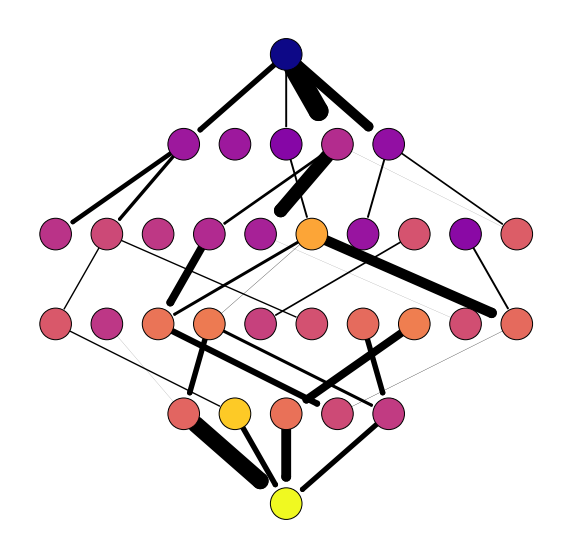

In [19]:
# plot edge flux

g = sim.plot_flux()

#### `.edge_counts`

Pandas DataFrame containing the number of each edge step observed (columns) at each generation (rows).  Visualized using `.animate_flux(outpath)`

In [20]:
# print dictionary

sim.edge_counts

,"(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 8)","(0, 9)","(0, 12)","(0, 16)",...,"(25, 27)","(25, 29)","(26, 27)","(26, 30)","(27, 31)","(28, 29)","(28, 30)","(28, 31)","(29, 31)","(30, 31)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,18,0,18,0,2,22,0,0,22,...,0,0,0,0,0,0,0,0,0,0
2,18,13,0,19,0,0,13,0,2,15,...,0,0,0,0,0,0,0,0,0,0
3,18,13,2,11,0,0,11,2,0,23,...,0,0,0,0,0,0,0,0,0,0
4,14,16,0,11,0,0,9,2,2,12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# animate flux over simulation


if os.path.exists('SLiM_demo/animate'):
    shutil.rmtree('SLiM_demo/animate')
os.mkdir('SLiM_demo/animate')    # make directory for animation frames
sim.animate_flux('SLiM_demo/animate/5_site')    # make gif
Image(open('SLiM_demo/animate/5_site.gif','rb').read())    # show gif

FileExistsError: [Errno 17] File exists: 'GenotypePhenotypeSLiM/animate'